<a href="https://colab.research.google.com/github/nhosamani/Machine_Learning/blob/main/load_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston=load_boston()


df=pd.DataFrame(boston.data)
df.columns=boston.feature_names
df['price']=boston.target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [196]:
#df=pd.DataFrame(boston.data)

In [197]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [198]:
X=df.drop('price',axis=1).values
y=df['price'].values

In [199]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=10)

In [200]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [201]:
from sklearn.neighbors import KNeighborsRegressor
Knn=KNeighborsRegressor(n_neighbors=2)
Knn.fit(X_train,y_train)
y_predict=Knn.predict(X_test)

print(y_predict)

  #error=sqrt(mean_squared_eror(rms)



[30.25 23.4  23.3  25.6  20.45 12.9  36.15 16.8  22.05 46.55 19.7  27.85
 26.1  32.6  32.1  43.   24.35 25.5  24.3  21.3  23.3  13.6  19.3  23.45
 32.7  18.85 18.9  14.7  32.1   8.5  33.95 31.6  23.2  25.95 17.25 19.35
  7.95 31.7  22.65 22.   40.75 27.25 13.6  22.25 20.95 26.75 18.05 32.3
 39.45 18.55 21.7  14.6  22.   44.35 21.5  33.75 19.8  19.75 21.65 15.55
 21.1  20.2  38.5  43.   29.95 17.75 22.55 11.05 30.25 25.3  13.95 22.8
 19.75 19.75 23.75 21.55 43.25  8.8  18.6  31.8  18.9  24.75 21.4  22.65
 33.3  24.45 22.8  27.35 20.85 10.65 20.85 18.1  24.   20.85 19.05 18.9
 23.3  22.05 24.3  19.75 20.3  14.35 20.3  24.7  14.35 21.1  19.1  17.65
 22.7  19.6   7.9  19.75 21.5  27.85 21.1  10.55 20.85 21.45 16.25 20.9
 35.85 28.7  22.85 18.55 18.55 27.25 11.8  21.2  21.3  39.35 28.9   5.3
 32.1  25.5  13.6  23.75 28.4  32.1   9.65 10.   23.85  6.95 13.6  21.3
 12.3  18.9  36.25 23.2  22.55 22.5  12.3  21.  ]


In [202]:
test=Knn.score(X_test,y_test)
train=Knn.score(X_train,y_train)

In [203]:
print(test)
print(train)


0.7320875619320104
0.9152022780950553


In [204]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=[]
for k in range(2,20):
  Knn=KNeighborsRegressor(n_neighbors=k)
  Knn.fit(X_test,y_test)
  y_predict=Knn.predict(X_test)
  
  error=sqrt(mean_squared_error(y_predict,y_test))
  rms.append(error)
  print(k,error)

2 2.6706648344363124
3 3.4515050958821694
4 4.082026453503856
5 4.27149302136606
6 4.453956287188631
7 4.748311786600708
8 4.927474936683568
9 5.043320697538441
10 5.167178490494748
11 5.280439624427991
12 5.380685572446336
13 5.447848247650634
14 5.579059653671633
15 5.623086367147286
16 5.772427679029137
17 5.866985499302489
18 5.970439418384796
19 6.012661941517842


In [205]:
d=pd.DataFrame(rms)

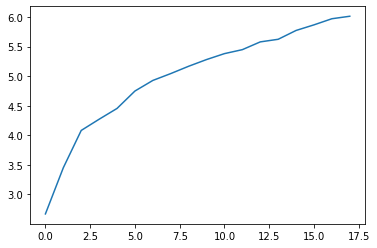

In [206]:
plt.plot(d)